In [ ]:
# Data augmentation techniques 

# image enhancement technique which was used in
#  Alexnet as data augmentation technique which improved the accuracy 
# of model by ilya


In [ ]:
from numpy import linalg
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def pca_color_augmention(image_array):
    '''
    image augmention: PCA jitter 
    :param image_array: image array
    :return img2: after PCA-jitter Enhanced image array
    '''
    assert image_array.dtype == 'uint8'
    assert image_array.ndim == 3
    # The input image should be (w, h, 3) such a three channel distribution
    
    img1 = image_array.astype('float32') / 255.0
    # Calculate the variance and mean of R, G and B channels respectively
    mean = img1.mean(axis = 0).mean(axis = 0)
    std = img1.reshape((-1, 3)).std()    # img1.std(axis = 0).std(axis = 0) cannot be used
    
    # Standardize the image according to channel (mean value is 0 and variance is 1)
    img1 = (img1 - mean) / (std)
    
    # Expand the image into three strips according to three channels
    img1 = img1.reshape((-1, 3))
    
    # PCA operation on matrix
    # Find the covariance matrix of the matrix
    cov = np.cov(img1, rowvar = False)
    # Finding eigenvalues and vectors of covariance matrix
    eigValue, eigVector = linalg.eig(cov)

    # Jitter coefficient (standard distribution with mean value of 0 and variance of 0.1)
    rand = np.array([random.normalvariate(0, 0.2) for i in range(3)])
    jitter = np.dot(eigVector, eigValue * rand)
    
    jitter = (jitter * 255).astype(np.int32)[np.newaxis, np.newaxis, :]

    img2 = np.clip(image_array + jitter, 0, 255)
    
    return img2

def show_image(image_array):
    for _ in range(8):
    
        ax = plt.subplot(241 + _)
        ax.imshow(pca_color_augmention(image_array))
        ax.axis('off')
    plt.show()



In [ ]:
!wget https://programmer.ink/images/think/f6d6cc4337dc5e9c676be0b65afaddf5.jpg -O leaf.jpg


--2022-06-19 12:52:10--  https://programmer.ink/images/think/f6d6cc4337dc5e9c676be0b65afaddf5.jpg
Resolving programmer.ink (programmer.ink)... 185.218.125.0
Connecting to programmer.ink (programmer.ink)|185.218.125.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 197233 (193K) [image/jpeg]
Saving to: ‘leaf.jpg’

leaf.jpg            100%[===================>] 192.61K   637KB/s    in 0.3s    

2022-06-19 12:52:12 (637 KB/s) - ‘leaf.jpg’ saved [197233/197233]



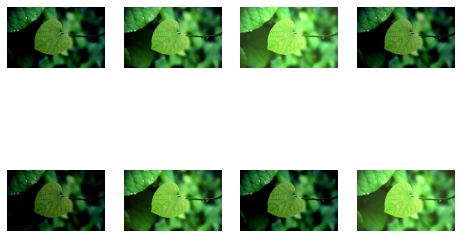

In [ ]:

img_tensor = np.array(Image.open('leaf.jpg'))
show_image(img_tensor)


\begin{align}
k^2(\sigma^2_R+\sigma^2_G+\sigma^2_B) &= 3 \\
k &= \sqrt{\frac{3}{\sigma^2_R+\sigma^2_G+\sigma^ 2_B}}
\end{align}

In [ ]:
def pca_color_augmentation_modify(image_array_input):
    assert image_array_input.ndim == 3 and image_array_input.shape[2] == 3
    assert image_array_input.dtype == np.uint8

    img = image_array_input.reshape(-1, 3).astype(np.float32)
    # Scattering calculation
    ch_var = np.var(img, axis=0)
    # Scattering
    scaling_factor = np.sqrt(3.0 / sum(ch_var))
    # Average 
    img = (img - np.mean(img, axis=0)) * scaling_factor

    cov = np.cov(img, rowvar=False)
    lambd_eigen_value, p_eigen_vector = np.linalg.eig(cov)

    rand = np.random.randn(3) * 0.1
    delta = np.dot(p_eigen_vector, rand*lambd_eigen_value)
    delta = (delta * 255.0).astype(np.int32)[np.newaxis,np.newaxis, :]
    # something which illya team did and enhanced the resolution of image 
    img_out = np.clip(image_array_input + delta, 0, 255).astype(np.uint8)
    return img_out

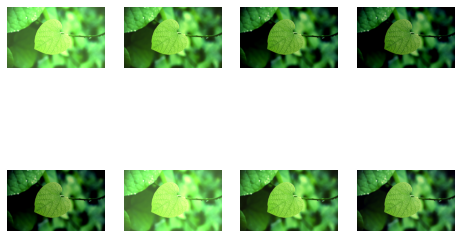

In [ ]:
# show_image(pca_color_augmentation_modify(img_tensor))

for _ in range(8):

    ax = plt.subplot(241 + _)
    ax.imshow(pca_color_augmentation_modify(img_tensor))
    ax.axis('off')
plt.show()

 86%|████████▌ | 6/7 [00:00<00:00, 15.77it/s]


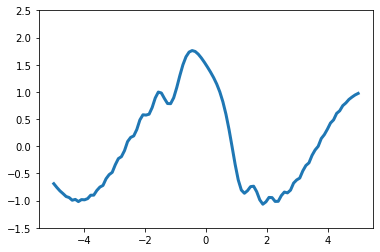

In [ ]:
# importing matplot lib
import matplotlib.pyplot as plt
import numpy as np
 
# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
 
# numpy array
x = np.linspace(-5, 5, 100)
 
# duration of the video
duration = 2
 
# matplot subplot
fig, ax = plt.subplots()
 
# method to get frames
def make_frame(t):
     
    # clear
    ax.clear()
     
    # plotting line
    ax.plot(x, np.sinc(x**2) + np.cos(x + 10 * np.pi / duration * t), lw = 3)
    ax.set_ylim(-1.5, 2.5)
     
    # returning numpy image
    return mplfig_to_npimage(fig)
 
# creating animation
animation = VideoClip(make_frame, duration = duration)
 
# displaying animation with auto play and looping
animation.ipython_display(fps = 3, loop = True, autoplay = True)